


# Project: TMDb Movies Data Analysis
Ana Chan
ana2004@gmail.com

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected for this report is the TMDb movies dataset. This dataset contains data about 10.866 movies including informations like for example popularity, budget, revenue, cast, director, runtime, genre and release date. Its original source is Kaggle. 

In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> **Research Questions**: In this report, the dataset will be analysed in order to answer to the following questions:
>
> 1. Is there a relationship between the budget and the popularity of a movie?
> 2. Who are the top 10 directors associated with the most popular movies?
> 3. Which movies are the 10 most popular from all times?
> 4. Which movies have the top 10 highest profits?
> 5. Is there a relationship between movies popularity and profits?
> 6. How is the evolution of the number of movies produced per year?
> 7. What runtime type of movie is most popular (long, moderate long, medium, short movies)?
> 8. Which genres are most popular?
> 9. What is the period of the year when more movies were released?
>
> Overall, the scope of this research is to analyse popularity factors among the available data. This analysis works with the variables: popularity, budget, revenue, director, profit, runtime, genres and release date (year and month).

<a id='wrangling'></a>
## Data Wrangling

> In this section, the dataset will be loaded, analysed and cleanned. The first step is to get informations about the dataset, identify potencial issues and needed actions in order to prepare it for analysis and research.

### General Properties

In [2]:
# load the dataset from the file 'tmdb-movies.csv'
df = pd.read_csv('/Users/anachan/Desktop/DataNanodegree/Project2/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Note:** 
The data was successfully read and there are 21 columns in the dataframe:
1. 2 id columns (id and imdb_id)
2. popularity column, measured as a numeric value
3. budget and revenue columns (in US\\$)
4. original_title
5. cast, which contains a list of the actors separated by '|'
6. homepage of the movie
7. director
8. tagline and overview, which cointain text
9. runtime, which is the duration in minutes
10. genres, which contains a list of the genres separated by '|'
11. production_companies, which contains a list of the production companies separated by '|'
12. release date in format mm/dd/yy
13. vote_count and vote_average
14. release_year in format yyyy
15. budget_adj and revenue_adj accounting for inflation over time (in US\\$) 

In [3]:
# view dimensions of the dataset
df.shape

(10866, 21)

> **Note:** The dataframe has 10866 rows and 21 columns.

In [4]:
# view a summarized information about the dataset, including the data types
# and the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Notes:** 
1. There are several columns with missing values: imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies
2. There are columns with numerical data types (int and float)
3. There are columns with object data type

In [5]:
# view summary statistics for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Notes:** From this data, we can get the following statistical information:
1. The popularity values vary within the range: 0.00 to 32.99 and its average value is 0.65. We can also see that 75% of the movies have popularity below 0.71
2. The budget values vary from 0 to 4.25e+08 and at least 50% of the movies have a budget of 0
3. The revenue values vary from 0 to 2.78e+09 and at least 50% of the movies have a revenue of 0
4. The average runtime of the movies is 102 minutes and the maximum runtime is 900 minutes
5. The vote_count and vote_average columns will not be used in this analysis, they will be dropped ahead
6. The movies release year vary from 1960 and 2015 and at least 50% are from 2006 and earlier years
7. The budget_adj and revenue_adj columns have similar values as budget and revenue columns but having account for inflation. These columns will be kept in this analysis to have a more accurate comparison of these values over the time (will be used in one of the research questions)

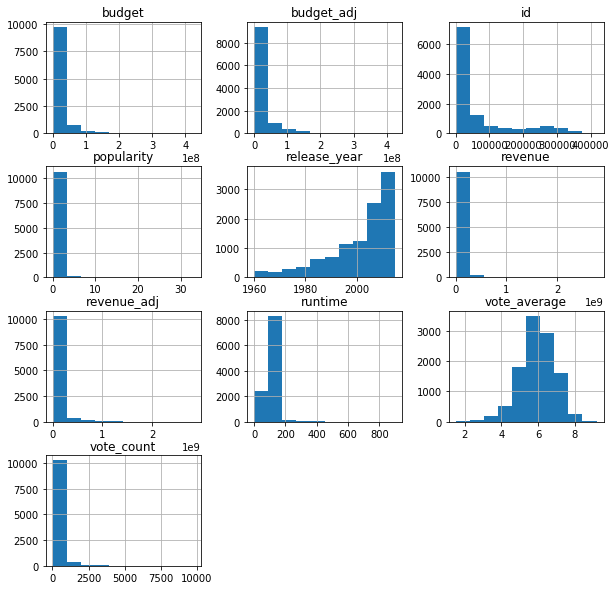

In [6]:
# view the histogram of the dataframe
df.hist(figsize=(10,10));

> **Note:** The histogram of the dataframe agrees with the summary statistics:
1. The histograms of the budget and budget_adj are similar and both skewed to the right, which means that the majority of the movies had a very low budget
2. The histogram of the popularity is also skewed to the right, meaning that the majority of the movies had low popularity values
3. The histogram of the release_year is skewed to the left, which means that the majority of the movies were produced in the later years
4. Concerning the revenue and revenue_adj, the histograms are similar and skewed to the right, which indicates that the majority of the movies had low revenues
5. The histogram of the runtime is skewed to the right, meaning that the majority of the movies have less than 250 minutes

In [7]:
# check the number of rows with missing values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Note:** This information confirms that there are missing data in the columns: imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies. 

In [8]:
# view the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> **Notes:** 
1. These are the number of unique values for each column
2. There are 10865 unique values for id, which means that one value is duplicated for this column (the total number of rows is 10866)
3. There are 10855 unique values for imdb_id, which means that 11 values are duplicated for this column (of a total of 10866 rows)
4. There are 56 unique values for release_year, which means that there are movies for all years in the range between 1960 (min) and 2015 (max)

In [9]:
# view which values of imdb_id are duplicated
df[df['imdb_id'].duplicated()]['imdb_id']

997           NaN
1528          NaN
1750          NaN
2090    tt0411951
2401          NaN
4797          NaN
4872          NaN
6071          NaN
7527          NaN
7809          NaN
Name: imdb_id, dtype: object

In [10]:
# check how many rows of imdb_id are NULL
len(df[df['imdb_id'].isnull()]['imdb_id'])

10

> **Note:** 10 of the duplicated values of imdb_id are NULL values, therefore there is only 1 trully duplicated value in this column

### Drop unnecessary data columns

In [11]:
# drop the data columns that will not be used in this data analysis: id, imdb_id, budget, revenue, cast, homepage, 
# tagline, keywords, production_companies, overview, vote_count and vote_average

df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'tagline', 'keywords', 'production_companies',
         'overview', 'vote_count', 'vote_average'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 764.1+ KB


> **Note:** 
1. The id, imdb_id, cast, homepage, tagline, keywords, production_companies, overview, vote_count and vote_average columns were dropped from the dataset because in this research they will not be used.
2. The budget and revenue columns were dropped because it is more accurate to use budget_adj and revenue_adj for analysis and comparison over time, as they include inflation over the years.
3. After dropping the columns that will not be used, the dataset has 2 columns with missing values: director and genres. 
4. The release_year column will also be dropped ahead, as it contains duplicated information (the year is also contained in release_date), but before it is dropped, it will be used further on.

### Check for duplicated data

In [12]:
# view the number of rows with duplicated data
df.duplicated().sum()

1

> **Note:** There is 1 duplicated row. Let's check the data in this row.

In [13]:
# view the duplicated row
df[df.duplicated()]

,popularity,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,2010,30000000.0,967000.0


In [14]:
# select the duplicated data
df.query('original_title == "TEKKEN"')

,popularity,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
2089,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,2010,30000000.0,967000.0
2090,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,2010,30000000.0,967000.0


> **Note:** These 2 rows have exactly the same data. The duplicated data can be dropped.

In [15]:
# remove the duplicated row
df.drop_duplicates(inplace=True)

# check if the duplicated row was correctly removed
df.duplicated().sum()

0

> **Note:** The duplicated data was sucessfully removed. No more duplicated rows.

In [16]:
# view the number of rows in the dataframe after duplicates removal
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 848.8+ KB


> **Note:** 
After the removal of the duplicates, the dataframe has 10865 rows.

### Fix missing values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 848.8+ KB


> **Note:** 
The dataset has 2 columns with missing values: director and genres. These columns are not numeric, they contain strings. Let's analyse each one of them and decide how to manage the missing values in each case.

In [18]:
# analyse 'director' column with missing values
# view how many rows have missing values in this column
df['director'].isnull().sum()

44

> **Note:** 
The column 'director' have 44 missing values. Let's view the histogram for the rows where 'director' have missing values.

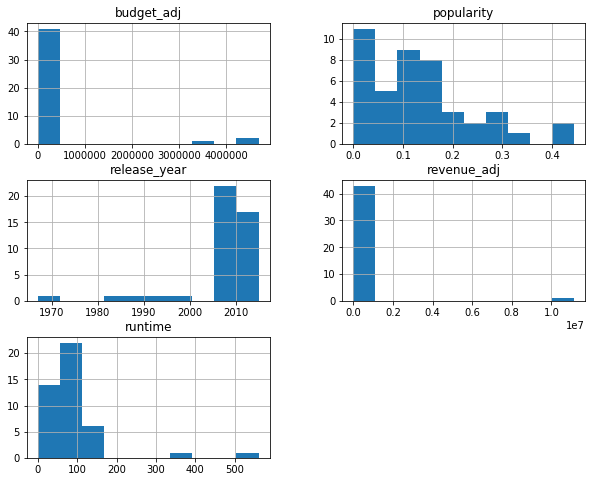

In [19]:
# analyse histogram of the rows with missing values for 'director'
df[df['director'].isnull()].hist(figsize=(10,8));

> **Note:** 
The histograms of the rows with 'director' missing values have similar distributions compared to the histograms of the full dataset. Since this is a column with data type string, these rows with missing data will not be dropped, instead the missing values will be filled with the string 'unknown'. This way, the rows can be accounted in the research.

In [20]:
# fill 'director' missing values with the string 'unknown'
df['director'].fillna('unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 848.8+ KB


> **Note:** 
The dataframe still has 1 column with missing values: genres.

In [21]:
# analyse 'genres' column with missing values
# view how many rows have missing values in this column
df['genres'].isnull().sum()

23

> **Note:** 
There are 23 missing values in the column 'genres'. Let's view the histogram for these rows where 'genres' have missing values.

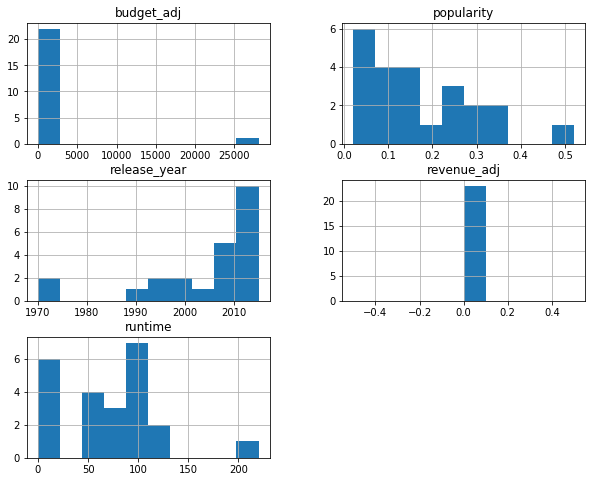

In [22]:
# analyse histogram of the rows with missing values for 'genres'
df[df['genres'].isnull()].hist(figsize=(10,8));

> **Note:** 
The histograms of the rows with 'genres' missing values have similar distributions compared to the histograms of the full dataset. Since this is not a numeric data type column, the missing values will be filled with the string 'unknown' in order to be able to work with these rows in the research.

In [23]:
# fill 'genres' missing values with the string 'unknown'
df['genres'].fillna('unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 848.8+ KB


> **Note:** 
All the missing values were filled. The dataframe has not missing values anymore.

### Fix date_release data type

In [24]:
# check the data type of date_release column
type(df['release_date'][0])

str

> **Note:** 
It was already known that the data type of the date_release column is object, and now it is confirmed that it is a string (str). It is necessary to convert this data type into a Timestamp type in order to be able to use date methods and attributes and work with it in a more suitable way.

In [25]:
# check the date format used for 'release_date'
df['release_date'].head(10)

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
5    12/25/15
6     6/23/15
7     9/30/15
8     6/17/15
9      6/9/15
Name: release_date, dtype: object

> **Note:** 
The release_date format is 'mm/dd/yy'.

In [26]:
# check what is the years range
df['release_year'].describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

> **Notes:** 
1. The release_year values are between 1960 and 2015
2. The format of release_date identifies the year with just 2 digits 'mm/dd/yy'
3. Before using the datetime conversion, it is necessary to turn the year into 4 digits in order to avoid converting problems
4. Example of a converting problem: the year in the release_date 6/9/15 could be 1915 or 2015. But since the years range is between 1960 and 2015, it can only be 2015.
5. Therefore, the next step is to convert the release_date to the format: 'mm/dd/yyyy'

In [27]:
# convert the release_date to the format: 'mm/dd/yyyy'

# to add a 4 digit year format in the release_date, we will remove the last 2 characters
# from the string and add the release_year (4 characters).

df['release_date'] = df.apply(lambda x: '%s%s' % (x['release_date'][:-2],x['release_year']), axis=1)
df['release_date'].head()

0      6/9/2015
1     5/13/2015
2     3/18/2015
3    12/15/2015
4      4/1/2015
Name: release_date, dtype: object

> **Note:** The release_date column (string) has the format: 'mm/dd/yyyy'. Now it can be converted to a Timestamp data type without problems.

In [28]:
# convert data type of release_date to a Timestamp type
df['release_date'] = pd.to_datetime(df['release_date'])

# check the data type of date_release column
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

> **Note:** The release_date column data type is now Timestamp. The release_year column is not needed anymore, as the year is already included in the release_date column, therefore it will be dropped.

In [29]:
# drop the release_year: it is no longer necessary as it is included in release_date
df.drop(['release_year'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null datetime64[ns]
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.1+ MB


> **Note:** After the cleaning process, the dataset has 10865 rows and 8 columns and no missing nor duplicated values. The dataset is clean and ready for analysis and research. 

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, the research questions listed in the Introduction section are addressed and all the analysis, statistics and visualizations performed for each question are presented and explained in detail.


### 1. Is there a relationship between the budget and the popularity of a movie?

In [30]:
# view the dataset first rows
df.head()

,popularity,original_title,director,runtime,genres,release_date,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,1.747999e+08,1.385749e+09


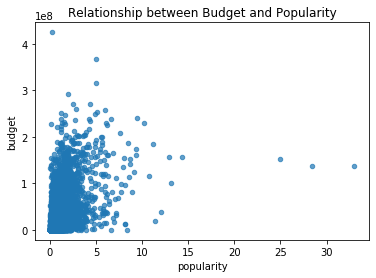

In [31]:
# use a scatter plot to view the relationship between the budget and the popularity
df.plot(x='popularity', y='budget_adj', kind='scatter', title='Relationship between Budget and Popularity', alpha=.7)
plt.xlabel('popularity')
plt.ylabel('budget');

> **Note:** According to the scatter plot, the movies with low budget also have low popularity. There is positive correlation between the budget and the popularity.

### 2. Who are the top 10 directors associated with the most popular movies?

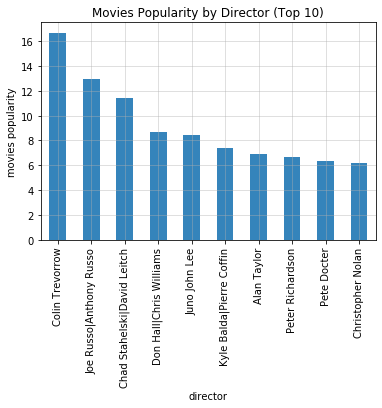

In [34]:
# it is necessary to group the dataset by director and calculate the popularity average 
# value for all the movies of each director and get the directors with the top 10
# popularity averages
df_dir = df.groupby('director').popularity.mean().nlargest(10)

# plot a bar chart to vizualize the top 10 directors with higher popularity averages
df_dir.plot(kind='bar', title='Movies Popularity by Director (Top 10)', alpha=.9)
plt.grid(True, alpha=.5)
plt.xlabel('director')
plt.ylabel('movies popularity');

> **Note:** This bar chart shows the list of the top 10 directors with higher movies popularity average. The director with most popular movies is Colin Trevorrow.

### 3. Which movies are the 10 most popular from all times?

In [35]:
# select the 10 most popular movies
top10_pop = df.sort_values(by='popularity', ascending=False).head(10)
top10_pop = top10_pop[['original_title', 'popularity']]
top10_pop

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


> **Note:** These are the 10 most popular movies sorted by popularity. Jurassic Park is the most popular movie from the dataset.

### 4. Which movies have the top 10 highest profits?

In [36]:
# create a new column to calculate profit (revenue - budget)
df['profit'] = df['revenue_adj'] - df['budget_adj']
df[['profit', 'revenue_adj', 'budget_adj']].head()

,profit,revenue_adj,budget_adj
0,1.254446e+09,1.392446e+09,1.379999e+08
1,2.101614e+08,3.481613e+08,1.379999e+08
2,1.704191e+08,2.716190e+08,1.012000e+08
3,1.718723e+09,1.902723e+09,1.839999e+08
4,1.210949e+09,1.385749e+09,1.747999e+08


> **Note:** A new column was created containing the profit of each movie. It was calculated as the difference between the revenue and the budget.

In [37]:
# get the movies that generated the top 10 profits
top10_prof = df.sort_values(by='profit', ascending=False).head(10)
top10_prof[['original_title', 'profit']]

,original_title,profit
1329,Star Wars,2.750137e+09
1386,Avatar,2.586237e+09
5231,Titanic,2.234714e+09
10594,The Exorcist,2.128036e+09
9806,Jaws,1.878643e+09
8889,E.T. the Extra-Terrestrial,1.767968e+09
3,Star Wars: The Force Awakens,1.718723e+09
8094,The Net,1.551568e+09
10110,One Hundred and One Dalmatians,1.545635e+09
7309,The Empire Strikes Back,1.376998e+09


> **Note:** These are the 10 most profitable movies sorted by profit. The most profitable movie was Star Wars.

### 5. Is there a relationship between movies popularity and profits?

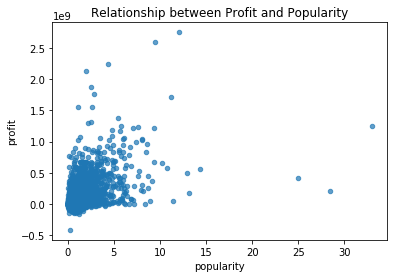

In [38]:
# use a scatter plot to view the relationship between the profit and the popularity
df.plot(x='popularity', y='profit', kind='scatter', title='Relationship between Profit and Popularity', alpha=.7)
plt.xlabel('popularity')
plt.ylabel('profit');

> **Note:** Although only 2 of the 10 most popular movies (view question 3) match the 10 most profitable movies (view question 4), there is a relationship of positive correlation between the popularity and the profit of the movies. In other words, more popular movies have higher profit.

### 6. How is the evolution of the number of movies produced per year?

In [45]:
# create a new column with year that will be used to group the dataset by year
df['year'] = df['release_date'].dt.year
df[['year', 'release_date']].head()

,year,release_date
0,2015,2015-06-09
1,2015,2015-05-13
2,2015,2015-03-18
3,2015,2015-12-15
4,2015,2015-04-01


> **Note:** The new column contains the year for each movie.

In [46]:
# group the dataset by the year and get the number of movies in each year
df_by_year = df.groupby('year').size()
df_by_year.head()

year
1960    32
1961    31
1962    32
1963    34
1964    42
dtype: int64

> **Note:** The dataset was grouped by the year. The function size() returns the number of rows in each group, in other words, the number of movies per year.

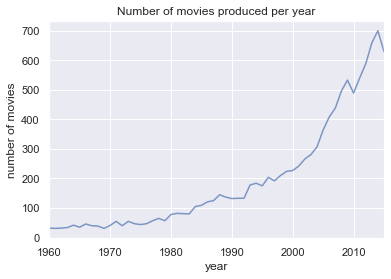

In [47]:
# enable seaborn style
sns.set()

# plot the evolution of the number of movies produced each year
df_by_year.plot(kind='line', title='Number of movies produced per year',
                alpha=.7)
plt.xlabel('year')
plt.ylabel('number of movies');

> **Note:** In this line chart, it is possible to see the evolution of the number of produced movies along the years:
1. In 1980, the annual number of movies started to increase
2. From the year 2000 on, the production of movies increased a large amount consistently over the years, having 2 points of a small drop around 2010 and 2015

In [48]:
# drop the year column because it is no longer necessary
df.drop(['year'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null datetime64[ns]
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
profit            10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.1+ MB


### 7. What runtime type of movie is most popular (long, moderate long, medium, short movies)?

In [49]:
# The movies runtime is a numeric column, therefore it is necessary to organize its values into categories
# like long, mod_long, medium and short, in order to divide the movies into runtime categories.

# The first step is to find out the intervals edges of this categories division
df['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

> **Note:** From this summary statistics, the following values will be used as edges for the runtime categories:
1. min: 0
2. percentile 25%: 90
3. percentile 50%: 99
4. percentile 75%: 111
5. max: 900

In [50]:
# define the categories edges
cat_edges = [0, 90, 99, 111, 900]

# define the labels for the categories
categories = ['short', 'medium', 'mod_long', 'long']

> **Note:** There will be 4 runtime categories: long, moderate long, medium and short movies

In [51]:
# create a new column for the runtime categories and use cut function to divide
# the movies among the new categories according to the edges
df['runtime_cat'] = pd.cut(df['runtime'], cat_edges, labels=categories)
df[['runtime','runtime_cat']].head(10)

,runtime,runtime_cat
0,124,long
1,120,long
2,119,long
3,136,long
4,137,long
5,156,long
6,125,long
7,141,long
8,91,medium
9,94,medium


> **Note:** The new column runtime_cat is created and it contains the new runtime category for each movie.

In [52]:
# group the dataset by the runtime category and calculate the average popularity of each group
runtime_pop = df.groupby('runtime_cat')['popularity'].mean()
runtime_pop

runtime_cat
short       0.410934
medium      0.549395
mod_long    0.647665
long        1.000219
Name: popularity, dtype: float64

> **Note:** The dataframe runtime_pop contains the runtime categories with the corresponding average popularity

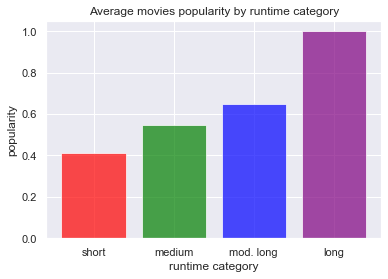

In [53]:
# plot a bar chart to visualize the popularity of each runtime category
sns.set()
plt.bar([1,2,3,4], runtime_pop, color=['red', 'green', 'blue', 'purple'], alpha=.7)
plt.xticks([1,2,3,4], ['short', 'medium', 'mod. long', 'long'])
plt.title('Average movies popularity by runtime category')
plt.xlabel('runtime category')
plt.ylabel('popularity');

> **Note:** The runtime category with higher popularity is the 'long movies'. It is also possible to see that the longer is the runtime, more popular is the movie.

### 8. Which genres are most popular?

In [54]:
# view all possible values for genres
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

> **Notes:** About the column 'genres' in this dataset:
1. The genres of each movie are concatenated in a string, separated by '|'
2. The number of genres is not the same for each movie
3. Each movie can have between 1 and 5 genres
4. The rows that originally had missing values for 'genres' were filled with the string 'unknown'

In [55]:
# get the rows where genres are not 'unknown'
df_g = df[df['genres'] != 'unknown']
df_g.head()

,popularity,original_title,director,runtime,genres,release_date,budget_adj,revenue_adj,profit,runtime_cat
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,1.379999e+08,1.392446e+09,1.254446e+09,long
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,1.379999e+08,3.481613e+08,2.101614e+08,long
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,1.012000e+08,2.716190e+08,1.704191e+08,long
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,1.839999e+08,1.902723e+09,1.718723e+09,long
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,1.747999e+08,1.385749e+09,1.210949e+09,long


> **Note:** For this question, only the rows which 'genres' column is not 'unknown' will be taken into account. In other words, the rows that originally had missing values for genres will be discarded for this analysis. 

In [56]:
# this function returns a dataframe with separated single genres by rows for the genres
# at the position i (inside the concatenated string)
# the argument i is the position of the genres inside the concatenated string
# example: Action|Crime|Thriller, Action has i=0, Crime has i=1 and Thriller has i=2
def separate_genres(i):
    
    # create a copy of the dataframe to get the genre at position i individually
    df_aux = df_g.copy()
    
    # split the values in the column genres in the position i of the concatenated string
    # (separated by |)
    # if there is no genre at index i, insert the value null in the dataframe
    df_aux['genres'] = df_aux['genres'].apply(lambda x: x.split("|")[i] if len(x.split("|")) >= i+1 else np.nan)
    
    # if there are rows with null 'genres' values, drop them
    if len(df_aux[df_aux['genres'].isnull()]['genres']):
        df_aux.dropna(axis=0, how='any', inplace=True)
    
    return df_aux

> **Notes:** 
1. A copy of the dataframe is made, in order to separate the values of 'genres' into different rows
2. It is necessary to check if it exists a genre at position i because each row can have between 1 and 5 genres and this number is not the same for all rows
3. If it exists, the index i value of 'genres' is split from the concatenated string
4. The genres with index i are stored in df_aux dataframe in separated rows
5. After the split, it is necessary to drop the rows with null value (returned by the split in the cases that there is no genre at index i)

In [57]:
# initialize a new dataframe that will contain all separated genres 
df_genres = pd.DataFrame()

# append the dataframes for each possible genres index position inside the concatenated string
# the function separate_genres is called to separate the genres at each index position
# as seen before, each row (concatenated string) can have between 1 and 5 genres
for x in range(5):
    df_genres = df_genres.append(separate_genres(x))
df_genres.shape

(26924, 10)

> **Note:** The 5 index position genres were separated into 5 dataframes and combined in order to get a single dataframe with all genres data. The resulting dataframe has 26924 rows and 10 columns.

In [58]:
# group the dataset with the separated genres by the different genres
# and calculate the popularity average for each genre
genres_pop = df_genres.groupby('genres')['popularity'].mean()

> **Note:** Group the genres dataframe by genre and calculate the popularity average for each genre.

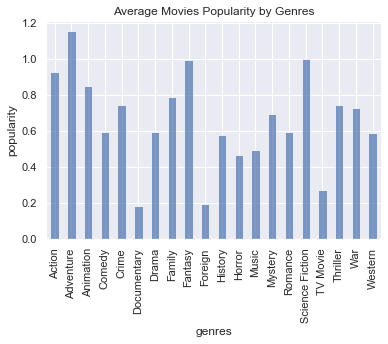

In [59]:
# plot a bar chart to visualize the popularity of each genre
sns.set()
genres_pop.plot(kind='bar', title='Average Movies Popularity by Genres',
                alpha=.7)
plt.xlabel('genres')
plt.ylabel('popularity');

> **Notes:** From this bar chart, it is possible to see that the most popular genre is Adventure followed by Fantasy and Science Fiction. The least popular genres are Documentary, Foreign and TV Movie.

### 9. What is the period of the year when more movies were released?

In [60]:
# create a new column with month that will be used to group the dataset by month
df['month'] = df['release_date'].dt.month
df[['month', 'release_date']].head()

,month,release_date
0,6,2015-06-09
1,5,2015-05-13
2,3,2015-03-18
3,12,2015-12-15
4,4,2015-04-01


In [61]:
# group the dataset by the month and get the number of movies in each month
df_by_month = df.groupby('month').size()
df_by_month

month
1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
dtype: int64

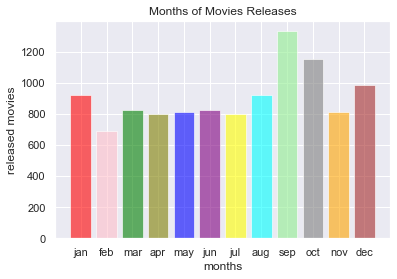

In [62]:
# create an bar chart to see the distribution of the movies along the months of the year
colors=['red','pink','green','olive','blue','purple','yellow','cyan','lightgreen','gray','orange','brown']

sns.set()
plt.bar([0,1,2,3,4,5,6,7,8,9,10,11], df_by_month, color=colors, alpha=.6)
plt.title('Months of Movies Releases')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], 
           ['jan', 'feb', 'mar', 'apr', 'may', 'jun' ,'jul', 'aug' ,'sep', 'oct', 'nov', 'dec'])
plt.xlabel('months')
plt.ylabel('released movies');

> **Note:** The months when more movies were released are in first place september and october and then in december and january, meaning that the periods of the year with more movies releases are after the summer and in Christmas and New Year time.

In [63]:
# drop the month column because it is no longer necessary
df.drop(['month'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null datetime64[ns]
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
profit            10865 non-null float64
runtime_cat       10834 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.2+ MB


<a id='conclusions'></a>
## Conclusions

> The scope of this study was to analyse several factors that could be associated with movies popularity. 

> Budget has a positive correlation with popularity. Movies with long runtimes are more popular, furthermore the longer is the movie, more popular it is. Specific genres are also more popular like Adventure, Fantasy and Science Fiction. Colin Trevorrow is the director with more popular movies.

>  The most popular movies are 'Jurassic Park', 'Mad Max: Fury Road' and 'Interstellar' and the most profitable movies are 'Star Wars', 'Avatar' and 'Titanic'. There is a positive correlation between the movies popularity and their profits.

> Other conclusions are that the number of produced movies has been increasing over the years, specially after the year 2000 and the periods of the year with more movies releases are the end of summer (september and october) and Christmas and New Year time (december and january).

> The limitations present in this dataset were missing values for the columns directors and genres. Those rows were considered into account in all researches but were discarded from the analysis of the corresponding directors and genres questions (2 and 8).

> List of used websites:
1. https://matplotlib.org
2. https://pandas.pydata.org/docs/user_guide/index.html
3. https://www.kaggle.com/tmdb/tmdb-movie-metadata
4. https://docs.python.org/3/

> Next, in this section, follow the conclusions reached for each research question.

### 1. Is there a relationship between the budget and the popularity of a movie?

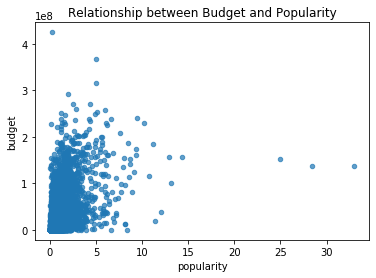

In [39]:
# use a scatter plot to view the relationship between the budget and the popularity
df.plot(x='popularity', y='budget_adj', kind='scatter', title='Relationship between Budget and Popularity', alpha=.7)
plt.xlabel('popularity')
plt.ylabel('budget');

> This scatter plot shows the relationship between budget and popularity. Most of the movies with low budget also have low popularity. Overall, there is positive correlation between the budget and the popularity.

### 2. Who are the top 10 directors associated with the most popular movies?

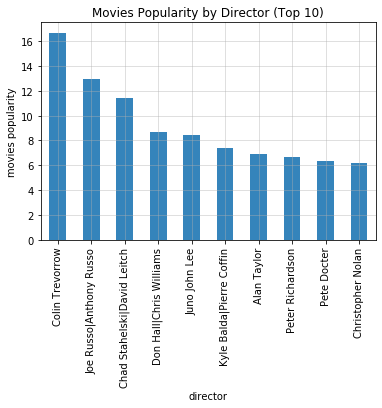

In [41]:
# plot a bar chart to vizualize the top 10 directors with higher popularity averages
df_dir.plot(kind='bar', title='Movies Popularity by Director (Top 10)', alpha=.9)
plt.grid(True, alpha=.5)
plt.xlabel('director')
plt.ylabel('movies popularity');

> This bar chart shows the list of the top 10 directors with higher movies popularity average. The director with most popular movies is Colin Trevorrow.

### 3. Which movies are the 10 most popular from all times?

In [42]:
# select the 10 most popular movies
top10_pop = df.sort_values(by='popularity', ascending=False).head(10)
top10_pop[['original_title', 'popularity']]

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


> These are the 10 most popular movies sorted by popularity. Jurassic Park is the most popular movie from the dataset.

### 4. Which movies have the top 10 highest profits?

In [43]:
# get the movies that generated the top 10 profits
top10_prof = df.sort_values(by='profit', ascending=False).head(10)
top10_prof[['original_title', 'profit']]

,original_title,profit
1329,Star Wars,2.750137e+09
1386,Avatar,2.586237e+09
5231,Titanic,2.234714e+09
10594,The Exorcist,2.128036e+09
9806,Jaws,1.878643e+09
8889,E.T. the Extra-Terrestrial,1.767968e+09
3,Star Wars: The Force Awakens,1.718723e+09
8094,The Net,1.551568e+09
10110,One Hundred and One Dalmatians,1.545635e+09
7309,The Empire Strikes Back,1.376998e+09


These are the 10 most profitable movies sorted by profit. The most profitable movie was Star Wars.

### 5. Is there a relationship between movies popularity and profits?

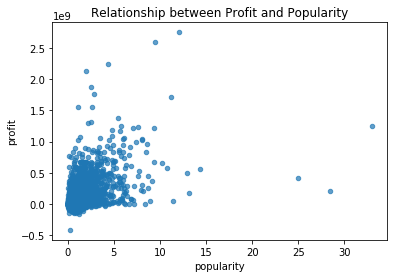

In [44]:
# use a scatter plot to view the relationship between the profit and the popularity
df.plot(x='popularity', y='profit', kind='scatter', title='Relationship between Profit and Popularity', alpha=.7)
plt.xlabel('popularity')
plt.ylabel('profit');

> Although only 2 of the 10 most popular movies (view question 3) match the 10 most profitable movies (view question 4), there is a relationship of positive correlation between the popularity and the profit of the movies. In other words, more popular movies have higher profit.

### 6. How is the evolution of the number of movies produced per year?

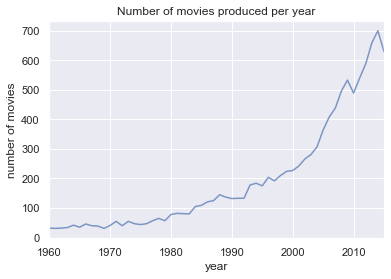

In [64]:
# plot the evolution of the number of movies produced each year
df_by_year.plot(kind='line', title='Number of movies produced per year',
                alpha=.7)
plt.xlabel('year')
plt.ylabel('number of movies');

> In this line chart, it is possible to see the evolution of the number of produced movies along the years:
1. In 1980, the annual number of movies started to increase
2. From the year 2000 on, the production of movies increased a large amount consistently over the years, having 2 points of a small drop around 2010 and 2015

### 7. What runtime type of movie is most popular (long, moderate long, medium, short movies)?

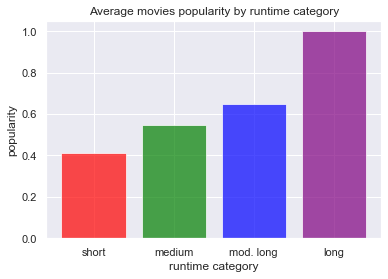

In [65]:
# plot a bar chart to visualize the popularity of each runtime category
sns.set()
plt.bar([1,2,3,4], runtime_pop, color=['red', 'green', 'blue', 'purple'], alpha=.7)
plt.xticks([1,2,3,4], ['short', 'medium', 'mod. long', 'long'])
plt.title('Average movies popularity by runtime category')
plt.xlabel('runtime category')
plt.ylabel('popularity');

> The runtime category with higher popularity is the 'long movies'. It is also possible to see that the longer is the runtime, more popular is the movie.

### 8. Which genres are most popular?

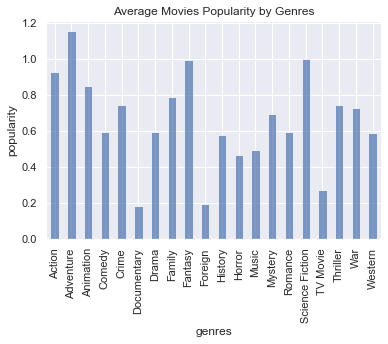

In [66]:
# plot a bar chart to visualize the popularity of each genre
sns.set()
genres_pop.plot(kind='bar', title='Average Movies Popularity by Genres',
                alpha=.7)
plt.xlabel('genres')
plt.ylabel('popularity');

> From this bar chart, it is possible to see that the most popular genre is Adventure followed by Fantasy and Science Fiction. The least popular genres are Documentary, Foreign and TV Movie.

### 9. What is the period of the year when more movies were released?

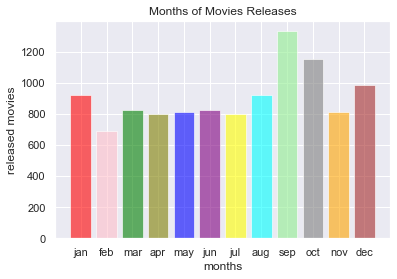

In [67]:
# create an bar chart to see the distribution of the movies along the months of the year
colors=['red','pink','green','olive','blue','purple','yellow','cyan','lightgreen','gray','orange','brown']

sns.set()
plt.bar([0,1,2,3,4,5,6,7,8,9,10,11], df_by_month, color=colors, alpha=.6)
plt.title('Months of Movies Releases')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], 
           ['jan', 'feb', 'mar', 'apr', 'may', 'jun' ,'jul', 'aug' ,'sep', 'oct', 'nov', 'dec'])
plt.xlabel('months')
plt.ylabel('released movies');

> The months when more movies were released are in first place september and october and then in december and january, meaning that the periods of the year with more movies releases are after the summer and in Christmas and New Year time.